# Calculate probabilities distribution for a cycle with 2n nodes

In [1]:
def calculate_probabilities(n):
    total_nodes = 2 * n
    probabilities = []

    for i in range(0, n + 1):
        if i == 0 or i == n:
            probability = 1 / (2 * n)
        else:
            probability = 1 / n
        probabilities.append(probability)

    return probabilities

n = 5  # Example: n = 5, total_nodes = 10
probabilities = calculate_probabilities(n)
print(probabilities)

[0.1, 0.2, 0.2, 0.2, 0.2, 0.1]


# Calculate the Approximation with given distribution and lambda and p

In [2]:
def value(prob,lamda,p) :
  ans = -p*lamda
  inlog = 0
  for i in range (0,len(probabilities),1):
    inlog = inlog + prob[i] * np.exp(-1 * i * lamda)

  ans = ans - np.log(inlog)
  return ans

# Plot Approximatoin answer and p

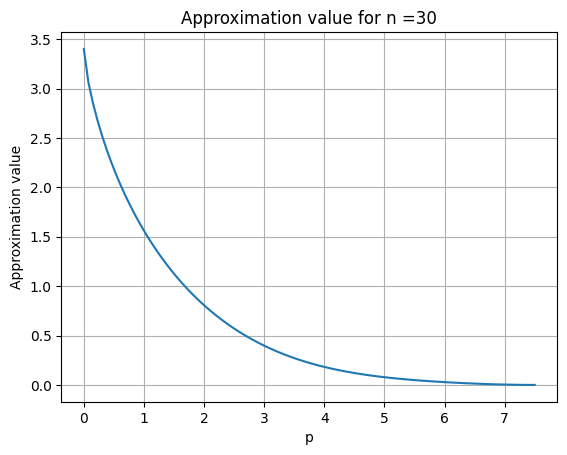

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n = 15 # Replace with your desired value of n ( half of the cycle lenght)

probabilities = calculate_probabilities(n)
# Generate x values between 0 and 1
p = np.linspace(0, n/2, 100)
lamda = ((n/2)**(1/(2*n)) - p**(1/(2*n))) * 18
#lamda = ((n/2)**(1/(4*n)) - p**(1/(4*n))) * 22

# Calculate the function values
g = value(probabilities,lamda,p)
y = g


plt2xdata = p
plt2ydata = y


# Plot the function
plt.plot(plt2xdata, plt2ydata)
plt.xlabel('p')
plt.ylabel('Approximation value')
plt.title('Approximation value for n =' + "30" )
plt.grid(True)
plt.show()

# Plotting the objective function

<ipython-input-4-d6eb211394d2>:19: RuntimeWarning: divide by zero encountered in log
  s = s + x[i] * np.log( x[i] * m / 2)
<ipython-input-4-d6eb211394d2>:19: RuntimeWarning: invalid value encountered in double_scalars
  s = s + x[i] * np.log( x[i] * m / 2)
<ipython-input-4-d6eb211394d2>:22: RuntimeWarning: divide by zero encountered in log
  s = s + x[l-1] * np.log(x[l - 1] * m)
<ipython-input-4-d6eb211394d2>:22: RuntimeWarning: invalid value encountered in double_scalars
  s = s + x[l-1] * np.log(x[l - 1] * m)
<ipython-input-4-d6eb211394d2>:17: RuntimeWarning: divide by zero encountered in log
  s = s + x[0] * np.log(x[0] * m)
<ipython-input-4-d6eb211394d2>:17: RuntimeWarning: invalid value encountered in double_scalars
  s = s + x[0] * np.log(x[0] * m)


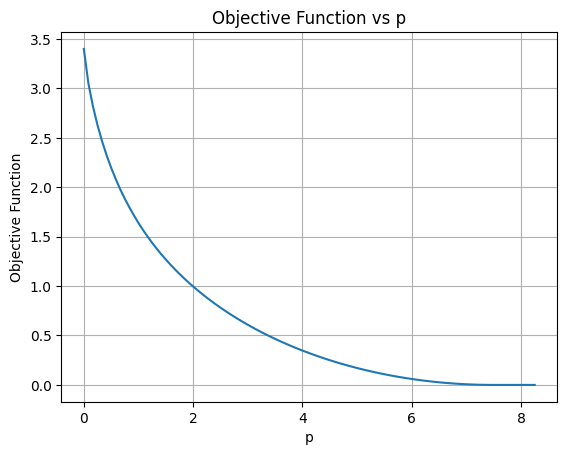

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


n = 30
m = n
diam = 15

D = 1.1 * n / 4 #D bar calculation



def objective(x):
    l = x.size
    s = 0
    s = s + x[0] * np.log(x[0] * m)
    for i in range (1, l - 1, 1):
      s = s + x[i] * np.log( x[i] * m / 2)


    s = s + x[l-1] * np.log(x[l - 1] * m)
    return s



def expectedvalue(x):
  s = 0
  for i in range(0, x.size ,1):
    s = s + i * x[i]
  return s



def constraint(x, p):
    return p - expectedvalue(x)



def optimize_objective(p, diam):
    x0 = [0.5] * (diam + 1)
    bounds = [(0, 1)] * (diam + 1)
    constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1},
                   {'type': 'ineq', 'fun': lambda x: constraint(x,p)}]
    result = minimize(objective, x0, bounds=bounds, constraints=constraints)
    return result.x


# Plotting the objective function
p_values = np.linspace(0, D, 100)
objective_values = [objective(optimize_objective(p, diam)) for p in p_values]

plt4xdata = p_values
plt4ydata = objective_values

plt_Cn = plt.plot(p_values, objective_values)
plt.xlabel('p')
plt.ylabel('Objective Function')
plt.title('Objective Function vs p')
plt.grid(True)
plt.show()

# final Plot

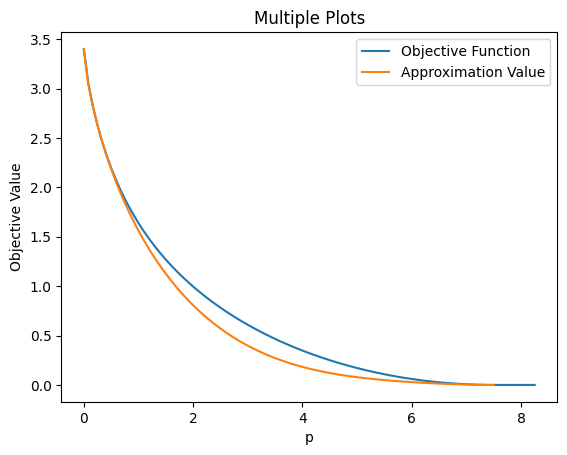

In [5]:
import matplotlib.pyplot as plt

# Create three plots

plt1 = plt.plot(plt4xdata,   plt4ydata,   label='Objective Function')
plt2 = plt.plot(plt2xdata,   plt2ydata,   label='Approximation Value')

# Set labels and title
plt.xlabel('p')
plt.ylabel('Objective Value')
plt.title('Multiple Plots')

# Add legend
plt.legend()

# Show the plot
plt.show()